<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #7: Clasificación de textos
`Fecha de entrega: Abril 22, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [1]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot
import graphviz 
from sklearn.tree import export_graphviz

In [2]:
# Cargar datos
data = pd.read_csv("C:/Users/andre/Downloads/reviews_vidjew_es.csv")
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


### `[8 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [3]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

###  `[8 pts]` Punto 2: Hacer pre-procesamiento del texto

In [4]:
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto=texto.lower()
    texto=re.sub(r"[\W\d_]+"," ", texto)
    texto=texto.split()
    texto=[palabra for palabra in texto if palabra not in stopwords_sp]
    texto= " ".join(texto)
    return texto

tfidf_vect= TfidfVectorizer(preprocessor=pre_procesado)

In [5]:
x_train= tfidf_vect.fit_transform(train.review_body.values)
y_train= train.product_category.values

x_test=tfidf_vect.transform(test.review_body.values)
y_test=test.product_category.values

###  `[10 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, Árbol de Decisión, u otro.

In [6]:
dt=DecisionTreeClassifier(class_weight='balanced')
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [7]:
y_pred_dt= dt.predict(x_test)

###  `[10 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [8]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

     jewelry       0.76      0.78      0.77        97
 video_games       0.79      0.77      0.78       103

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.78      0.78       200



###  `[BONUS: 3 pts]` Matriz de confusión

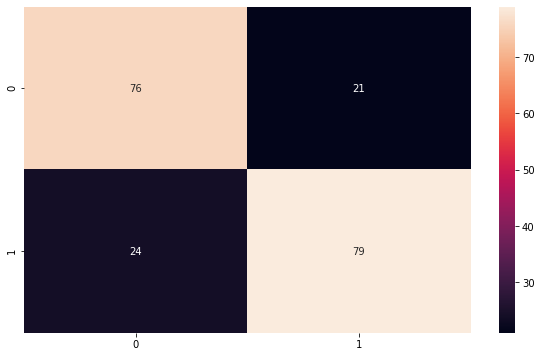

In [9]:
mat = confusion_matrix(y_test,y_pred_dt)
plt.figure(figsize=(10, 6))
x = sns.heatmap(mat, annot=True)

###  `[12 pts]` Punto 5: Términos más importantes de cada categoría

In [10]:
vocab = {value:key for key,value in tfidf_vect.vocabulary_.items()}
vocab

{1897: 'mismísimo',
 1637: 'juego',
 2077: 'ordenador',
 685: 'creía',
 1840: 'mejorado',
 1424: 'gráficos',
 294: 'bien',
 2466: 'queda',
 670: 'corto',
 103: 'ahora',
 2366: 'primera',
 3144: 'vez',
 583: 'compro',
 149: 'amazon',
 3051: 'ultima',
 2777: 'sido',
 2213: 'perfecta',
 334: 'buenas',
 568: 'compramos',
 517: 'colgante',
 1312: 'forma',
 652: 'corazón',
 2717: 'salido',
 773: 'defectuoso',
 683: 'creo',
 2273: 'plata',
 3160: 'vino',
 373: 'caja',
 2527: 'rayado',
 1511: 'ido',
 2530: 'rayando',
 1744: 'llevándolo',
 705: 'cuerpo',
 370: 'caerse',
 2150: 'pasando',
 701: 'cuello',
 990: 'durado',
 314: 'bonito',
 969: 'dos',
 1001: 'días',
 978: 'duda',
 2108: 'pagaría',
 439: 'casi',
 1895: 'mismo',
 3112: 'vendedor',
 1169: 'esperamos',
 2646: 'respuesta',
 1732: 'llegó',
 1000: 'día',
 2979: 'tocaba',
 2164: 'pedí',
 89: 'agosto',
 911: 'dijeron',
 1728: 'llegaría',
 1672: 'lanzamiento',
 2022: 'noviembre',
 204: 'aquí',
 3154: 'viendo',
 156: 'amigos',
 2030: 'nunca',

In [11]:
print("Las palabras que más aportan a la clase 0 'Videojuegos' son:")
[(vocab[e[0]],round(e[1],2)) for e in zip(dt.feature_importances_.argsort(), sorted(dt.feature_importances_))][:10]

Las palabras que más aportan a la clase 0 'Videojuegos' son:


[('abajo', 0.0),
 ('paquetería', 0.0),
 ('paquetes', 0.0),
 ('par', 0.0),
 ('paradas', 0.0),
 ('parche', 0.0),
 ('parece', 0.0),
 ('parecen', 0.0),
 ('parecia', 0.0),
 ('parecida', 0.0)]

In [12]:
print("Las palabras que más aportan a la clase 1 'Joyeria' son:")
[(vocab[e[0]],round(e[1],2)) for e in zip(dt.feature_importances_.argsort(), sorted(dt.feature_importances_))][-10:]

Las palabras que más aportan a la clase 1 'Joyeria' son:


[('plata', 0.02),
 ('grandes', 0.02),
 ('bonita', 0.02),
 ('foto', 0.02),
 ('pulsera', 0.03),
 ('bonitos', 0.03),
 ('bonito', 0.03),
 ('calidad', 0.03),
 ('mando', 0.06),
 ('juego', 0.12)]

In [13]:
ej = ['plata, pulsera, grandes']
nuevos_trans = tfidf_vect.transform(ej)
dt.predict(nuevos_trans)

array(['jewelry'], dtype=object)

### `[2 pts]` Punto 6: Pregunta

- ¿Qué interpretación y/o conclusiones saca de su modelo?

El modelo permite clasificar de manera apropiada la categoria de las reseñas, la visualización del arbol de decisión permite evidenciar de mejor manera cuales son los terminos que mejor diferenciar las categorias, iniciando desde juego, mando, calidad y bonito


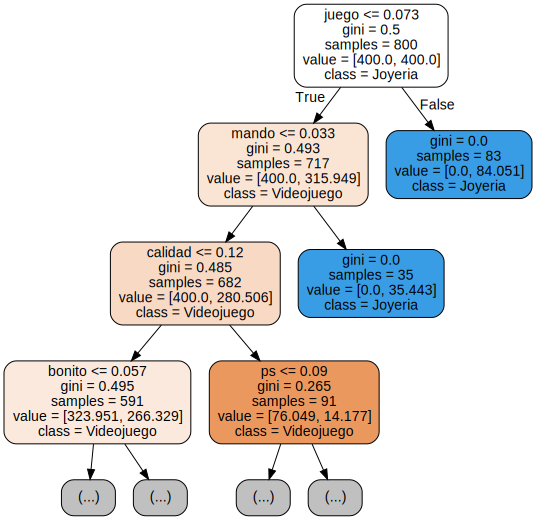

In [17]:
print("El modelo permite clasificar de manera apropiada la categoria de las reseñas, la visualización del arbol de decisión \
permite evidenciar de mejor manera cuales son los terminos que mejor diferenciar las categorias, iniciando desde juego, mando, \
calidad y bonito")

viz = export_graphviz(dt, 
                      out_file=None, # ¿Salvar en el computador?
                      max_depth=3, # Máxima profundidad
                      feature_names=list(dict(sorted(tfidf_vect.vocabulary_.items())).keys()), # Palabras
                      class_names = ['Videojuego', 'Joyeria'],
                      rounded=True, filled=True
                     )

graph = graphviz.Source(viz)
graph